<img src="./param.png" width=600>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("./winequality_dataset/train.csv",header=0,index_col=None)

In [3]:
data = pd.read_csv("./winequality/winequality/winequality-white.csv",header=0,index_col=None)

In [4]:
train_data = train_data.append(data[:3500])

In [5]:
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8,8
1,6.2,0.20,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2,6
2,7.1,0.23,0.35,16.5,0.040,60.0,171.0,0.99900,3.16,0.59,9.1,6
3,7.5,0.20,0.47,16.9,0.052,51.0,188.0,0.99944,3.09,0.62,9.3,5
4,7.0,0.15,0.38,15.3,0.045,54.0,120.0,0.99750,3.18,0.42,9.8,6


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6897 entries, 0 to 3499
Data columns (total 12 columns):
fixed acidity           6897 non-null float64
volatile acidity        6897 non-null float64
citric acid             6897 non-null float64
residual sugar          6897 non-null float64
chlorides               6897 non-null float64
free sulfur dioxide     6897 non-null float64
total sulfur dioxide    6897 non-null float64
density                 6897 non-null float64
pH                      6897 non-null float64
sulphates               6897 non-null float64
alcohol                 6897 non-null float64
quality                 6897 non-null int64
dtypes: float64(11), int64(1)
memory usage: 700.5 KB


In [7]:
train_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

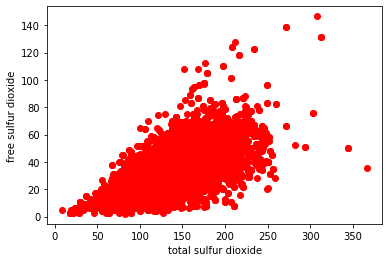

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel="total sulfur dioxide",ylabel="free sulfur dioxide")
ax.scatter(train_data["total sulfur dioxide"],train_data["free sulfur dioxide"],c="r")
plt.show()

### 数据集划分

In [9]:
from sklearn.model_selection import train_test_split

X = train_data.iloc[:,:-1]
y = np.ravel(train_data.quality)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2019)

In [10]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.19,0.27,13.9,0.057,45.0,155.0,0.99807,2.94,0.41,8.8
1,6.2,0.20,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2
2,7.1,0.23,0.35,16.5,0.040,60.0,171.0,0.99900,3.16,0.59,9.1
3,7.5,0.20,0.47,16.9,0.052,51.0,188.0,0.99944,3.09,0.62,9.3
4,7.0,0.15,0.38,15.3,0.045,54.0,120.0,0.99750,3.18,0.42,9.8


In [11]:
y

array([8, 6, 6, ..., 6, 6, 7], dtype=int64)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5517, 11)
(5517,)
(1380, 11)
(1380,)


### 数据预处理

In [11]:
from sklearn.preprocessing import PolynomialFeatures

print("Shape of X_train before transformation:",X_train.shape)
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_poly = poly.transform(X)
print("Shape of X_train after transformation:",X_train_poly.shape)


Shape of X_train before transformation: (3200, 11)
Shape of X_train after transformation: (3200, 77)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train_poly)
X_train = scaler.transform(X_train_poly)
X_test = scaler.transform(X_test_poly)

X = scaler.transform(X_poly)

### 数据归一化处理

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X = scaler.transform(X)

### ML模型

In [13]:
# 传统机器方法大杂烩
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
def get_models():
    models = []
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("DT",DecisionTreeClassifier()))
    models.append(("SVM rbf",SVC()))
    models.append(("SVM linear",SVC(kernel="linear")))
    models.append(("LDA",LinearDiscriminantAnalysis()))
    models.append(("Cat",CatBoostClassifier(silent=True)))
    return models

def cross_validation_scores_for_various_ml_models(X_cv,y_cv):
    print("cross validation accuracy".upper())
    models = get_models()
    
    results = []
    names = []
    
    for name,model in models:
        kfold = KFold(n_splits=5,shuffle=True,random_state=2019)
        cv_result = cross_val_score(model,X_cv,y_cv,cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{}cross validation,accuracy:{:0.2f}".format(name,cv_result.mean()))

In [39]:
cross_validation_scores_for_various_ml_models(X,y)

CROSS VALIDATION ACCURACY
LRcross validation,accuracy:0.52
NBcross validation,accuracy:0.45
KNNcross validation,accuracy:0.46
DTcross validation,accuracy:0.56
SVM rbfcross validation,accuracy:0.54
SVM linearcross validation,accuracy:0.53
LDAcross validation,accuracy:0.53
Catcross validation,accuracy:0.61


**Random Forest**

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
scores = {}

for n_estimators in range(10,810,10):
    RF_model = RandomForestClassifier(n_estimators=n_estimators,random_state=2019)
    RF_model.fit(X_train,y_train)
    RF_predictions = RF_model.predict(X_test)
    RF_mae = mean_absolute_error(RF_predictions,y_test)
    scores[n_estimators] = RF_mae

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [ ]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

In [ ]:
RF_model = RandomForestClassifier(n_estimators=best_n_estimators,random_state=2019)
RF_model.fit(X_train,y_train)
RF_predictions = RF_model.predict(X_test)
RF_mae = mean_absolute_error(RF_predictions,y_test)

print(f"Mean Absolute Error:{RF_mae}")
print(classification_report(y_test,RF_predictions))

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[120,140,300,500,800,1200]}
RF_model_new = RandomForestClassifier(random_state=2019)
RF_grid = GridSearchCV(RF_model_new,param_grid,verbose=1,n_jobs=-1,cv=3,scoring="neg_mean_absolute_error")
RF_grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   26.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=2019, verbose=0,
                                              warm_start=False),
             iid

In [26]:
RF_grid.best_params_

{'n_estimators': 1200}

In [28]:
RF_model = RandomForestClassifier(n_estimators=140,random_state=2019)
RF_model.fit(X_train,y_train)
RF_predictions = RF_model.predict(X_test)
RF_mae = mean_absolute_error(RF_predictions,y_test)

print(f"Mean Absolute Error:{RF_mae}")
print(classification_report(y_test,RF_predictions))

Mean Absolute Error:0.3926470588235294
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.83      0.23      0.36        22
           5       0.70      0.70      0.70       211
           6       0.62      0.80      0.70       290
           7       0.72      0.46      0.56       113
           8       0.88      0.39      0.54        36
           9       0.00      0.00      0.00         2

    accuracy                           0.66       680
   macro avg       0.54      0.37      0.41       680
weighted avg       0.68      0.66      0.65       680



**ExtraTreeClassifier**

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

In [25]:
scores = {}

for n_estimators in range(10,600,10):
    extra_model = ExtraTreesClassifier(n_estimators=n_estimators,random_state=2019)
    extra_model.fit(X_train,y_train)
    extra_predictions = extra_model.predict(X_test)
    extra_mae = mean_absolute_error(extra_predictions,y_test)
    scores[n_estimators] = extra_mae

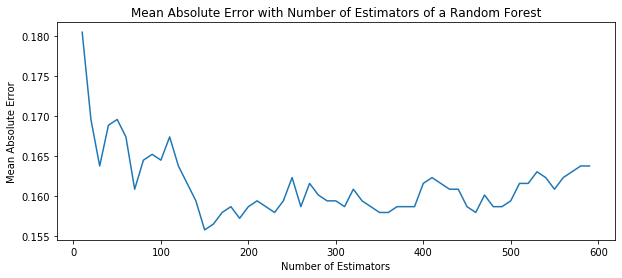

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [27]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

Best Number of Estimators:150


In [28]:
extra_classifier = ExtraTreesClassifier(n_estimators=530,random_state=2019)
extra_classifier = extra_classifier.fit(X_train,y_train)
extra_classifier_prediction = extra_classifier.predict(X_test)
extra_mae = mean_absolute_error(extra_classifier_prediction,y_test)
print(f"Mean Absolute Error:{extra_mae}")

Mean Absolute Error:0.16304347826086957


### Ensemble

**K-Nearest Neighbors**

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors":st.randint(1,40),
                         "weights":["uniform","distance"]}

KN_model = KNeighborsClassifier()
KN_grid = RandomizedSearchCV(KN_model,param_grid,verbose=1,n_jobs=-1,cv=3)
KN_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028CB56C7E48>,
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [50]:
print(KN_grid.best_params_)

{'n_neighbors': 32, 'weights': 'distance'}


In [51]:
KN_model = KNeighborsClassifier(n_neighbors=30,weights="distance")
KN_model.fit(X_train,y_train)
KN_predictions = KN_model.predict(X_test)
KN_mae = mean_absolute_error(KN_predictions,y_test)

print(f"Mean Absolute Error:{KN_mae}")

Mean Absolute Error:0.5441176470588235


**Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
logistic_prediction = logistic_regression.predict(X_test)
logistic_mae = mean_absolute_error(logistic_prediction,y_test)
print(f"Mean Absolute Error:{logistic_mae}")

Mean Absolute Error:0.5970588235294118


**LinearRegression**

In [53]:
from sklearn.linear_model import LinearRegression

lin_regression = LinearRegression()
lin_regression.fit(X_train,y_train)
lin_prediction = lin_regression.predict(X_test)
lin_mae = mean_absolute_error(lin_prediction,y_test)
print(f"Mean Absolute Error:{lin_mae}")

Mean Absolute Error:0.6353137915187634


**ElasticNet**

In [54]:
from sklearn.linear_model import ElasticNet

ela_regression = ElasticNet()
ela_regression.fit(X_train,y_train)
els_prediction = ela_regression.predict(X_test)
ela_mae = mean_absolute_error(els_prediction,y_test)
print(f"Mean Absolute Error:{ela_mae}")

Mean Absolute Error:0.698948525093073


**PolynomialFeatures**

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=5,include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [16]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)
poly_reg_prediction = poly_reg.predict(X_test_poly)
poly_reg_mae = mean_absolute_error(poly_reg_prediction,y_test)
print(f"Mean Absolute Error:{poly_reg_mae}")

Mean Absolute Error:19.971436771294478


**SVM**

In [24]:
from sklearn.svm import SVC

param_grid = {"C":[0.001,0.01,0.1,1,10,100,200,300,400,500],
                         "kernel":["linear","rbf"],
                         "class_weight":["balanced",None]}

SVM_model = SVC(random_state=2019,kernel="linear")
SVM_grid = GridSearchCV(SVM_model,param_grid,verbose=1,n_jobs=-1,cv=3,scoring="neg_mean_absolute_error")
SVM_grid.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.1min finished
D:\software\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=2019,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400,
                               500],
                         'class_weight': ['balanced', None],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [25]:
SVM_grid.best_params_

{'C': 500, 'class_weight': None, 'kernel': 'rbf'}

In [26]:
svm_model = SVC(kernel="rbf",C=500,random_state=2019,class_weight=None)
svm_model.fit(X_train,y_train)
svm_predictions = svm_model.predict(X_test)
svm_mae = mean_absolute_error(svm_predictions,y_test)
print(f"Mean Absolute Error:{svm_mae}")

Mean Absolute Error:0.5676470588235294


**BaggingClassifier**

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
scores = {}

for n_estimators in range(10,500,10):
    BC_model = BaggingClassifier(n_estimators=n_estimators,random_state=2019)
    BC_model.fit(X_train,y_train)
    BC_predictions = BC_model.predict(X_test)
    BC_mae = mean_absolute_error(BC_predictions,y_test)
    scores[n_estimators] = BC_mae

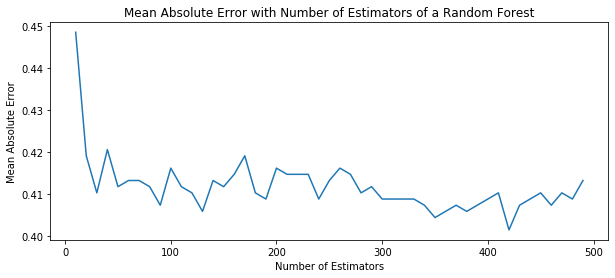

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [30]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

Best Number of Estimators:420


In [31]:
bagging_classifier = BaggingClassifier(n_estimators=best_n_estimators,random_state=2019)
bagging_classifier = bagging_classifier.fit(X_train,y_train)
bagging_classifier_prediction = bagging_classifier.predict(X_test)
bagging_mae = mean_absolute_error(bagging_classifier_prediction,y_test)
print(f"Mean Absolute Error:{bagging_mae}")

Mean Absolute Error:0.40147058823529413


**Stochastic Gradient Descent**

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid = {"loss":["hinge","log","modified_huber","epsilon_insensitive","squared_epsilon_insensitive"]}

SGD_model =SGDClassifier(max_iter=5,tol=None)
SGD_grid = GridSearchCV(SGD_model,param_grid,verbose=1,n_jobs=-1,cv=3)
SGD_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.9s finished
D:\software\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=5,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=None,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             

In [26]:
print(SGD_grid.best_params_)

{'loss': 'modified_huber'}


In [27]:
SGD_model =SGDClassifier(max_iter=5,loss="log",tol=None)
SGD_model.fit(X_train,y_train)
SGD_predictions = SGD_model.predict(X_test)
SGD_mae = mean_absolute_error(SGD_predictions,y_test)

print(f"Mean Absolute Error:{SGD_mae}")

Mean Absolute Error:0.9308823529411765


**AdaBoost Classifier**

In [14]:
from sklearn.ensemble import AdaBoostClassifier

scores = {}

for n_estimators in range(10,600,10):
    Adaboost_model = AdaBoostClassifier(n_estimators=n_estimators,random_state=2019)
    Adaboost_model.fit(X_train,y_train)
    Adaboost_predictions = Adaboost_model.predict(X_test)
    Adaboost_mae = mean_absolute_error(Adaboost_predictions,y_test)
    scores[n_estimators] = Adaboost_mae

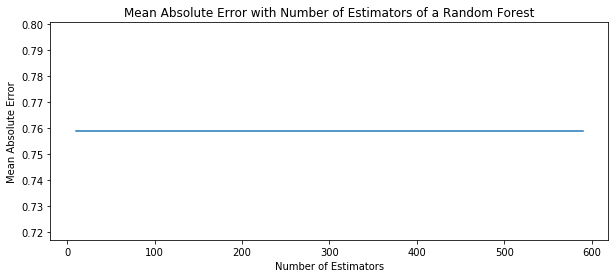

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [ ]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

In [30]:
param_grid = {"n_estimators":st.randint(1,500)}

AB_model = AdaBoostClassifier()
AB_grid = RandomizedSearchCV(AB_model,param_grid,verbose=1,n_jobs=-1,cv=3)
AB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.9s finished
D:\software\Anaconda\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': array([1]),
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028CB56C7B48>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [31]:
AB_grid.best_params_

{'learning_rate': 1, 'n_estimators': 197}

In [32]:
AB_model = AdaBoostClassifier(n_estimators=2,learning_rate=1)
AB_model.fit(X_train,y_train)
AB_predictions = AB_model.predict(X_test)
AB_mae = mean_absolute_error(AB_predictions,y_test)

print(f"Mean Absolute Error:{AB_mae}")

Mean Absolute Error:0.6823529411764706


**Gradient Boosting Classifier**

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
scores = {}

for n_estimators in range(100,600,10):
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators,random_state=2019)
    gb_model.fit(X_train,y_train)
    gb_predictions = gb_model.predict(X_test)
    gb_mae = mean_absolute_error(gb_predictions,y_test)
    scores[n_estimators] = gb_mae

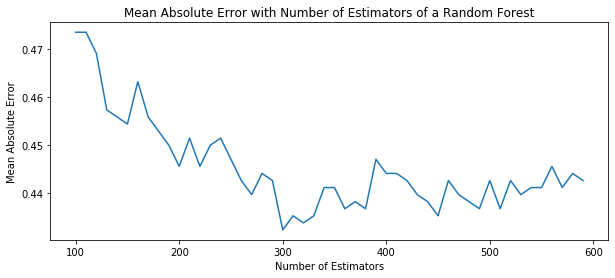

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [21]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

Best Number of Estimators:300


In [22]:
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=600)
gradient_boosting_classifier = gradient_boosting_classifier.fit(X_train,y_train)
gradient_boosting_classifier_prediction = gradient_boosting_classifier.predict(X_test)
gradient_boosting_mae = mean_absolute_error(gradient_boosting_classifier_prediction,y_test)
print(f"Mean Absolute Error:{gradient_boosting_mae}")

Mean Absolute Error:0.425


**XGBoost Classifier**

In [23]:
from xgboost.sklearn import XGBClassifier

scores = {}

for n_estimators in range(100,1000,10):
    xgb_model = XGBClassifier(n_estimators=n_estimators,random_state=2019)
    xgb_model.fit(X_train,y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_mae = mean_absolute_error(xgb_predictions,y_test)
    scores[n_estimators] = xgb_mae

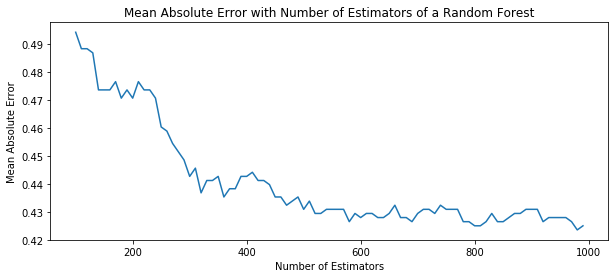

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [25]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

Best Number of Estimators:980


In [26]:
xgb_classifier = XGBClassifier(n_estimators=best_n_estimators)
xgb_classifier.fit(X_train,y_train)
xgb_classifier_prediction = xgb_classifier.predict(X_test)
xgb_mae = mean_absolute_error(xgb_classifier_prediction,y_test)
print(f"Mean Absolute Error:{xgb_mae}")

Mean Absolute Error:0.4235294117647059


**LightGMB**

In [30]:
from lightgbm import LGBMClassifier


scores = {}

for n_estimators in range(100,1000,10):
    lgb_model = LGBMClassifier(n_estimators=n_estimators,random_state=2019)
    lgb_model.fit(X_train,y_train)
    lgb_predictions = lgb_model.predict(X_test)
    lgb_mae = mean_absolute_error(lgb_predictions,y_test)
    scores[n_estimators] = lgb_mae

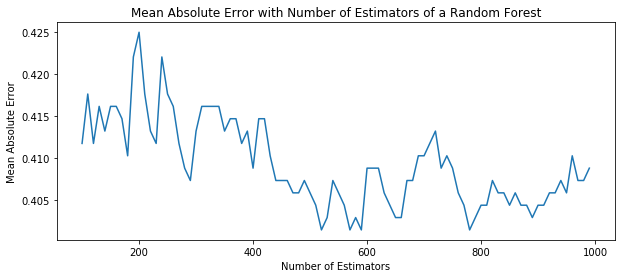

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_RF,ax_RF = plt.subplots(figsize=(10,4))
ax_RF.set_title("Mean Absolute Error with Number of Estimators of a Random Forest")
ax_RF.set_xlabel("Number of Estimators")
ax_RF.set_ylabel("Mean Absolute Error")
plt.plot(list(scores.keys()),list(scores.values()))

In [32]:
best_n_estimators = 0

for n_estimators,score in scores.items():
    if score == min(scores.values()):
        best_n_estimators = n_estimators
        print(f"Best Number of Estimators:{n_estimators}")

Best Number of Estimators:520
Best Number of Estimators:570
Best Number of Estimators:590
Best Number of Estimators:780


In [36]:
lgb_classifier = LGBMClassifier(n_estimators=570)
lgb_classifier.fit(X_train,y_train)
lgb_classifier_prediction = lgb_classifier.predict(X_test)
lgb_mae = mean_absolute_error(lgb_classifier_prediction,y_test)
print(f"Mean Absolute Error:{lgb_mae}")

Mean Absolute Error:0.40147058823529413


**CatBoost Classifier**

In [37]:
from catboost import CatBoostClassifier

In [38]:
cat_classifier = CatBoostClassifier(silent=True)
cat_classifier.fit(X_train,y_train)
cat_classifier_prediction = cat_classifier.predict(X_test)
cat_mae = mean_absolute_error(cat_classifier_prediction,y_test)
print(f"Mean Absolute Error:{cat_mae}")

Mean Absolute Error:0.46911764705882353


**Voting Classifier**

In [43]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ("lgb_classifier",LGBMClassifier(n_estimators=570)),
    ("extra_classifier",ExtraTreesClassifier(n_estimators=70)),
    ("random_classifier",RandomForestClassifier(n_estimators=160)),
     ("bagging_classifier",BaggingClassifier(n_estimators=160))
])
voting_classifier = voting_classifier.fit(X_train,y_train)
voting_classifier_prediction = voting_classifier.predict(X_test)
voting_mae = mean_absolute_error(voting_classifier_prediction,y_test)
print(f"Mean Absolute Error:{voting_mae}")

Mean Absolute Error:0.3985294117647059


**MLP**

In [ ]:
from sklearn.neural_network import MLPRegressor

paramters = [{"hidden_layer_sizes":[3,5,10,100],
                    "alpha":[0.1,1,10,100],
                    "activation":["relu","logistic","tanh","identity"]}]
nn = MLPRegressor(solver="lbfgs",random_state=2019)
nn = GridSearchCV(nn,paramters,n_jobs=-1,verbose=1,cv=3)
nn.fit(X_train,y_train)

In [ ]:
nn.best_params_

In [ ]:
nn = MLPRegressor(solver="lbfgs",random_state=2019,activation="tanh",alpha=10,hidden_layer_sizes=100)
nn.fit(X_train,y_train)
nn_predictions = nn.predict(X_test)
nn_mae = mean_absolute_error(nn_predictions,y_test)
print(f"Mean Absolute Error:{nn_mae}")

### DL模型

In [ ]:
# 模型定义
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()

# model.add(Dense(128,activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(64,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,LearningRateScheduler

checkpoint = ModelCheckpoint("dl.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1)
                              #min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
# 模型编译
model.compile(loss="mae",optimizer="adam",metrics=["mae"])

In [ ]:
# 模型训练
model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=1,validation_data=(X_test,y_test),callbacks=callbacks)

### 预测

In [33]:

RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
extra_model = ExtraTreesClassifier(n_estimators=680)
extra_model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=680,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [22]:
predict_df = pd.read_csv("winequality_dataset/test.csv",header=None)

In [23]:
predict_df

,0,1,2,3,4,5,6,7,8,9,10
0,8.9,0.300,0.35,4.60,0.032,32.0,148.0,0.99458,3.15,0.45,11.5
1,6.9,0.310,0.32,1.20,0.024,20.0,166.0,0.99208,3.05,0.54,9.8
2,6.3,0.190,0.29,2.00,0.022,33.0,96.0,0.98902,3.04,0.54,12.8
3,8.4,0.310,0.31,0.95,0.021,52.0,148.0,0.99038,2.93,0.32,11.5
4,7.0,0.240,0.24,1.80,0.047,29.0,91.0,0.99251,3.30,0.43,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1495,6.4,0.380,0.24,7.20,0.047,41.0,151.0,0.99604,3.11,0.60,9.2
1496,7.0,0.230,0.36,13.00,0.051,72.0,177.0,0.99720,3.16,0.49,9.8
1497,7.3,0.655,0.20,10.20,0.071,28.0,212.0,0.99710,2.96,0.58,9.2
1498,7.1,0.280,0.26,1.90,0.049,12.0,86.0,0.99340,3.15,0.38,9.4


In [28]:
predict_data = scaler.transform(predict_df)

In [24]:
predict_data = predict_df

In [25]:
predict_res = RF_model.predict(predict_data)

In [26]:
id = np.arange(predict_df.shape[0])+1
df = pd.DataFrame({"id":id,"predict":predict_res})

In [27]:
df.to_csv("submit00.csv",index=None,header=None)

**伪标签**

In [ ]:
res_csv = pd.read_csv("res.csv",names=["id","predict"])

In [ ]:
res_predict = res_csv["predict"]

In [ ]:
predict_df = pd.read_csv("winequality_dataset/test.csv",header=None)

In [ ]:
predict_df

In [ ]:
predict_df["predict"] = res_predict

In [ ]:
predict_df.to_csv("predict_test.csv")